In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

(1600,)
48000
0.03333333333333333


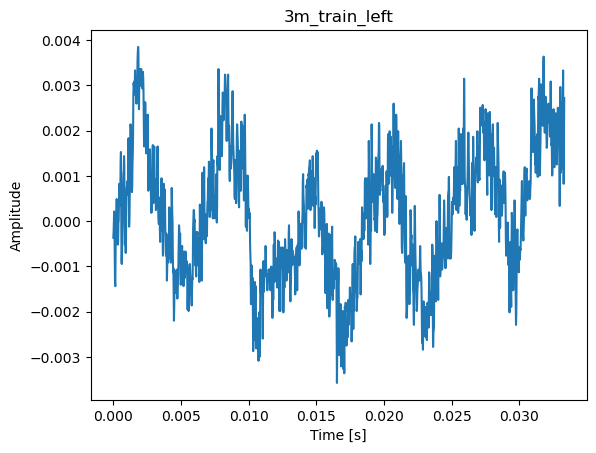

In [2]:
file_path="/home/neel/Acoustic/Acoustics/dataset2/datachunks/channel1_new_video0_28.wav"
file,sample_rate=librosa.load(file_path,sr=None)
print(file.shape)
print(sample_rate)
# file1=file[0]
# file2=file[1]
duration = len(file)/sample_rate
time = np.arange(0,duration,1/sample_rate) 
print(duration)
plt.plot(time,file)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('3m_train_left')
plt.show()

# duration = len(file2)/sample_rate
# time = np.arange(0,duration,1/sample_rate) 
# plt.plot(time,file2)
# plt.xlabel('Time [s]')
# plt.ylabel('Amplitude')
# plt.title('3m_train_right')
# plt.show()

In [3]:
window_size=int(512)
wd = np.hamming(window_size)
slide_size = int(4)
overlap = window_size - slide_size
frequency,time,spectrum1=signal.spectrogram(file,nfft=window_size,fs=sample_rate,window=wd,noverlap=overlap,mode='magnitude')
print(spectrum1.shape)
# plt.colorbar(label="magnitude")
# plt.xlabel("time")
# plt.ylabel("frequency")
# plt.show()

(257, 273)


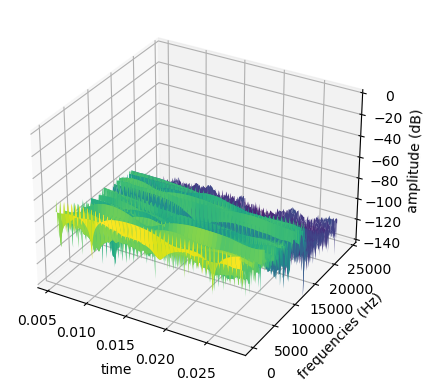

In [4]:
from matplotlib import mlab
spectrum,frequency,time=mlab.specgram(file,NFFT=window_size,Fs=sample_rate,window=wd,noverlap=overlap,mode='magnitude')
X, Y, Z = time[None, :], frequency[:, None],  20.0 * np.log10(spectrum)
ax=plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('time')
ax.set_ylabel('frequencies (Hz)')
ax.set_zlabel('amplitude (dB)')
ax.set_zlim(-140, 0)
plt.show()

In [26]:
print(spectrum1)

[[3.6837297e-04 3.7318023e-04 3.8153608e-04 ... 4.5060241e-04
  4.5025710e-04 4.4472670e-04]
 [2.0379042e-03 2.0368211e-03 2.0364209e-03 ... 6.6817726e-04
  6.6459394e-04 6.5799599e-04]
 [1.2757196e-03 1.2739362e-03 1.2718679e-03 ... 4.4648352e-04
  4.4416913e-04 4.4227185e-04]
 ...
 [4.5630057e-07 1.7863563e-07 1.7008804e-07 ... 3.1293409e-06
  3.1946099e-06 3.2881994e-06]
 [5.3142571e-07 9.7340290e-08 8.8391211e-08 ... 3.6349643e-06
  4.0830510e-06 3.0972840e-06]
 [4.6936731e-07 1.5934107e-07 1.5045842e-07 ... 3.9992515e-06
  3.4024729e-06 4.9171531e-06]]


In [15]:
frame_size=1024
hop_size=256
file1,sample_rate=librosa.load("/home/neel/Acoustic/Acoustics/dataset/datachunks/channel1_3m_train20_30.wav",sr=None)
file2,sample_rate=librosa.load("/home/neel/Acoustic/Acoustics/dataset/datachunks/channel2_3m_train20_1.wav",sr=None)
spec1=librosa.stft(file1,n_fft=frame_size,hop_length=hop_size)
# spec1=spec[0]
# spec2=spec[1]
# # spec2=librosa.stft(file2,n_fft=frame_size,hop_length=hop_size)
spec1=np.abs(spec1)**2   #uncomment if you want data with more clear seperation
# spec2=np.abs(spec2)**2
print(spec1.shape)

(513, 7)


In [ ]:
def plot_spectrogram(Y, sr, hop_length,img_name, title,y_axis="linear"):
    plt.figure(figsize=(25, 10))
    # plt.axis('off')
    plt.title(title)
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    plt.savefig(img_name+".jpg",bbox_inches='tight', pad_inches=0)
    print(img_name)
    # plot_spectrogram(spec, sample_rate, hop_size)

In [ ]:
spec_log1 =librosa.power_to_db(spec1)
plot_spectrogram(spec_log1, sample_rate, hop_size, "tmp",title="left channel",y_axis="linear")

# spec_log2 =librosa.power_to_db(spec2)
# plot_spectrogram(spec_log2, sample_rate, hop_size, "tmp2",title="right channel",y_axis="log" )

In [ ]:
filter_banks=librosa.filters.mel(n_fft=frame_size,sr=sample_rate,n_mels=80)

In [16]:
mel_spec1=librosa.feature.melspectrogram(file1,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=80)
mel_spec2=librosa.feature.melspectrogram(file2,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=10)

mel_spec1=np.abs(mel_spec1)**2
mel_spec2=np.abs(mel_spec2)**2    #uncomment if you want data with more clear seperation

log_mel1=librosa.power_to_db(mel_spec1)
log_mel2=librosa.power_to_db(mel_spec2)
print(mel_spec1.shape)

# plot_spectrogram(log_mel1, sample_rate, hop_size, "tmp1",title="left channel",y_axis="mel" )
# plot_spectrogram(log_mel2, sample_rate, hop_size, "tmp2",title="right channel",y_axis="mel" )

(80, 7)


/tmp/ipykernel_11645/3833982395.py:1: FutureWarning: Pass y=[ 0.00280762  0.00976562  0.05493164 ... -0.06808472 -0.12399292
 -0.07199097], sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec1=librosa.feature.melspectrogram(file1,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=80)
/tmp/ipykernel_11645/3833982395.py:2: FutureWarning: Pass y=[ 0.00906372 -0.0128479  -0.03103638 ...  0.04559326  0.03616333
  0.03903198], sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec2=librosa.feature.melspectrogram(file2,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=10)


## Bounding Box Configuration

625.00032 617.000274 162.99936 96.00001200000001


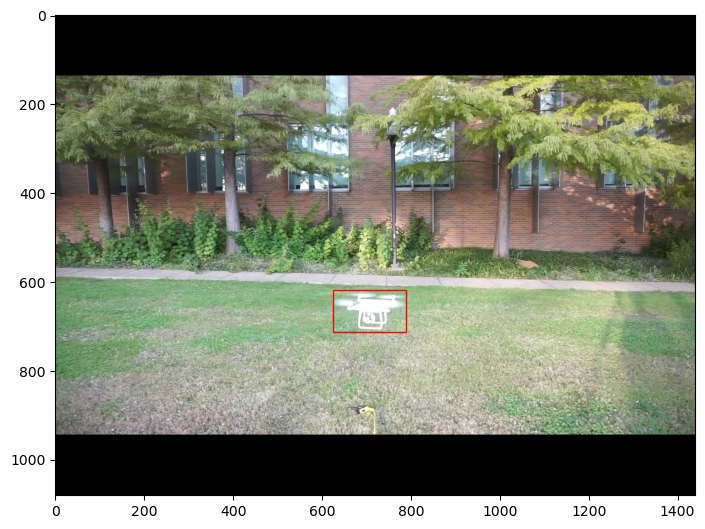

In [1]:
from matplotlib import patches
import matplotlib.pyplot as plt
import cv2
fig = plt.figure()
x_center=0.490625 *1440 
y_center=0.615741*1080
width= 0.113194*1440
height= 0.0888889*1080
xmin=x_center-(width/2)
ymin=y_center-(height/2)
ax = fig.add_axes([0,0,1,1])
print(xmin,ymin,width,height)
image = plt.imread('/home/neel/Acoustic/yolov5_training/img_data/frames/3m_train0_2.jpg')
plt.imshow(image)
rect = patches.Rectangle((xmin,ymin), width, height, edgecolor='r', facecolor='none')
ax.add_patch(rect)





In [3]:
import tensorflow as tf
from keras import backend as K


In [8]:

def iou_loss_func(y_true, y_pred):
  # Convert the predicted and ground truth bounding boxes to a format
  # suitable for calculating the IOU
  y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
  y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

  # Calculate the IOU between the predicted and ground truth bounding boxes
  x1_true, y1_true, x2_true, y2_true = tf.split(y_true, 4, axis=-1)
  x1_pred, y1_pred, x2_pred, y2_pred = tf.split(y_pred, 4, axis=-1)
  x1_true, x2_true, x1_pred, x2_pred= x1_true*1440 , x2_true*1440, x1_pred*1440, x2_pred*1440
  y1_true, y2_true, y1_pred, y2_pred= y1_true*1080 , y2_true*1080, y1_pred*1080, y2_pred*1080
  area_true = (x2_true - x1_true + 1) * (y2_true - y1_true + 1)
  area_pred = (x2_pred - x1_pred + 1) * (y2_pred - y1_pred + 1)
  x1_true = K.maximum(x1_true, x1_pred)
  y1_true = K.maximum(y1_true, y1_pred)
  x2_true = K.minimum(x2_true, x2_pred)
  y2_true = K.minimum(y2_true, y2_pred)
  intersection = K.maximum(0.0, x2_true - x1_true + 1) * K.maximum(0.0, y2_true - y1_true + 1)
 
  iou = intersection / (area_true + area_pred - intersection)
  return 1-iou

box1=[1238.0, 543.0, 100.0, 66.0]
box2=[8.931421414017677, 1063.9781999588013, 1416.7899569123983 ,-1059.7522321343422]
box1[2]+=box1[0]
box1[3]+=box1[1]
box2[2]+=box2[0]
box2[3]+=box2[1]
print(iou_loss_func(box1,box2))
print(iou_loss_func([39, 63, 203, 112], [54, 66, 198, 114]))

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([0.20422673], shape=(1,), dtype=float32)
